# Week 5
Ray Hu & Xietao Wang Lin

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.optimize import curve_fit

Parameters

In [3]:
gridPoints = 10

In [4]:
rods = np.loadtxt('rods.dat')
motors = np.loadtxt('motors.dat')
length = np.loadtxt('length_final.dat')
allLengths = np.loadtxt('length_all.dat')

numberOfRods = rods[:, 0].size

def gaussian(x, mu, sigma):
    return 1/((2*math.pi*(sigma**2))**(1/2)) * np.exp((-(x-mu)**2)/(2*(sigma**2)))


In [5]:
def calculateMotorPositions(RodsMatrix, MotorMatrix, numberOfMotors):

    motorPositions = np.zeros(numberOfMotors)
    position = RodsMatrix[0, 0] + MotorMatrix[0, 0]
    motorPositions[0] = position
    for motor in range(1, numberOfMotors):
        position = (RodsMatrix[motor, 0] + MotorMatrix[motor, 0])
        motorPositions[motor] = position
    
    return motorPositions

def plotSystem(RodsMatrix, MotorsMatrix, numberOfRods, gridPoints):

    motorPos = calculateMotorPositions(RodsMatrix, MotorsMatrix, numberOfRods)
    for row in range(0, numberOfRods):
        'Rods'
        y_r = np.ones(gridPoints)*row*0.2
        x_r = np.linspace(RodsMatrix[row, 0], RodsMatrix[row, 0] + RodsMatrix[row, 1], gridPoints, endpoint=True)
        
        plt.plot(x_r, y_r)
        'Motors'
        y_m = row*0.2 + 0.1
        x_m = motorPos[row]
        plt.scatter(x_m, y_m)

    plt.xlabel('x coordinate, motors in dots')
    plt.ylabel('Rods, rod 1 is y = 0, next rod is y += 0.2')
    plt.title('1D System')
    plt.show()

def plotMotorPositions(rods, motors, numberOfRods):

    motorsPos = calculateMotorPositions(rods, motors, numberOfRods)
    plt.hist(motorsPos, 10)
    plt.xlabel('x coordinate')
    plt.ylabel('Number of motors')
    plt.title('Motor distribution')
    plt.show()

def rodMidPointPositions(rods, numberOfRods):

    midPoints = np.zeros(numberOfRods)
    for point in range(0, numberOfRods):
        midPoints[point] = rods[point, 0] + rods[point, 1]*0.5
    plt.hist(midPoints, 10)
    plt.xlabel('x coordinate')
    plt.ylabel('Number of rod-midpoints')
    plt.title('Rod distribution')
    plt.show()

def bothPositions(rods, motors, numberOfRods):

    midPoints = np.zeros(numberOfRods)
    for point in range(0, numberOfRods):
        midPoints[point] = rods[point, 0] + rods[point, 1]*0.5
    motorsPos = calculateMotorPositions(rods, motors, numberOfRods)
    plt.hist(motorsPos, 10)
    plt.hist(midPoints, 10)
    plt.xlabel('x coordinate')
    plt.ylabel('Number of rod-midpoints/motors')
    plt.title('Rod/motor distribution')
    plt.show()

def lengthDistribution(lengths):

    plt.hist(lengths, 40, density=True)
    plt.xlabel('Length')
    plt.ylabel('Number')
    plt.title('Length distribution')
    x = np.linspace(70, 120, 100)
    plt.plot(x, gaussian(x, np.mean(lengths), np.std(lengths)))
    plt.show()

def averageLengthEvolution(allLengths):
    means = np.zeros(allLengths[0, :].size)
    for tstep in range(0, allLengths[0, :].size):
        mean = np.mean(allLengths[:, tstep])
        means[tstep] = mean
    
    plt.plot(np.linspace(0, means.size, means.size), (means))
    plt.xlabel('Time step')
    plt.ylabel('Average length')
    plt.title('Average length, 2000 simulations, v_d = v_p = 0.01')
    #plt.plot(np.linspace(0, means.size-150, means.size-150), means[:50])
    plt.show()
    
    

def motorRelativePositions(motors):
    plt.hist(motors[:, 0], 20)
    plt.show()
    

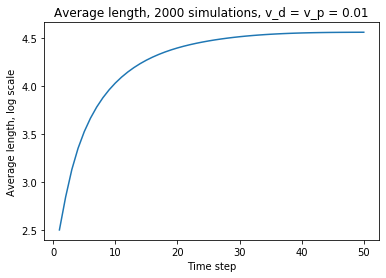

In [6]:

means = np.zeros(allLengths[0, :].size)
for tstep in range(0, allLengths[0, :].size):
    mean = np.mean(allLengths[:, tstep])
    means[tstep] = mean
    
#plt.plot(np.linspace(0, means.size, means.size), np.log(means))
plt.xlabel('Time step')
plt.ylabel('Average length, log scale')
plt.title('Average length, 2000 simulations, v_d = v_p = 0.01')
plt.plot(np.linspace(1, means.size-150, means.size-150), np.log(means[:50]))
plt.show()

optimal = [-0.03569482  1.12312344  1.77204718]
sqrt of cov = [0.00319201 0.02190596 0.01921831]
optimal, line = [0.88680133 1.94002222]
sqrt of cov, line = [0.01872602 0.03892307]


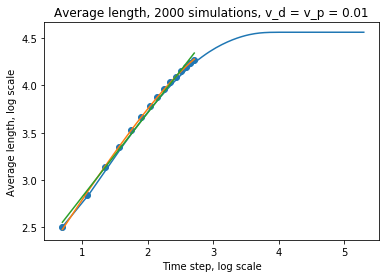

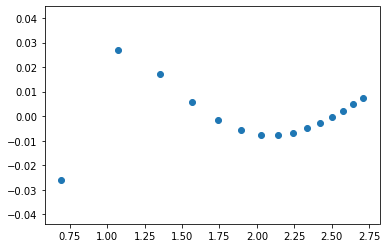

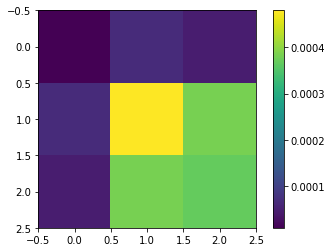

In [110]:
def line(x, a, b):
    return a*x + b

def quadratic(x, a, b, c):
    return a*np.exp(x) + b*x + c

means = np.zeros(allLengths[0, :].size)
for tstep in range(0, allLengths[0, :].size):
    mean = np.mean(allLengths[:, tstep])
    means[tstep] = mean

x = np.log(np.linspace(2, means.size-185, means.size-185))
y = np.log(means[0:15])
plt.plot(np.log(np.linspace(2, means.size, means.size)), np.log(means))
plt.xlabel('Time step, log scale')
plt.ylabel('Average length, log scale')
plt.title('Average length, 2000 simulations, v_d = v_p = 0.01')
plt.scatter(x, y)

popt, pcov = curve_fit(quadratic, x, y)
print(f'optimal = {popt}')
a_1, b_1, c_1 = popt
cov_1 = pcov
plt.plot(x, quadratic(x, a_1, b_1, c_1))
print(f'sqrt of cov = {np.sqrt(np.diag(pcov))}')


popt, pcov = curve_fit(line, x, y)
print(f'optimal, line = {popt}')
a_2, b_2 = popt
plt.plot(x, line(x, a_2, b_2))
print(f'sqrt of cov, line = {np.sqrt(np.diag(pcov))}')
plt.show()

plt.scatter(x, np.subtract(quadratic(x, a_1, b_1, c_1), y))
#plt.scatter(x, np.subtract(line(x, a_2, b_2), y))
plt.show()

plt.imshow(np.abs(cov_1))
plt.colorbar()
plt.show()

In [64]:
#plotSystem(rods, motors, numberOfRods, gridPoints)

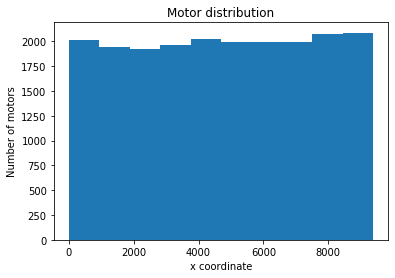

In [15]:
plotMotorPositions(rods, motors, numberOfRods)

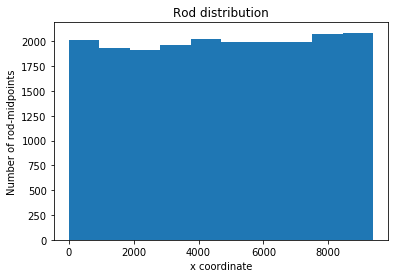

In [16]:
rodMidPointPositions(rods, numberOfRods)

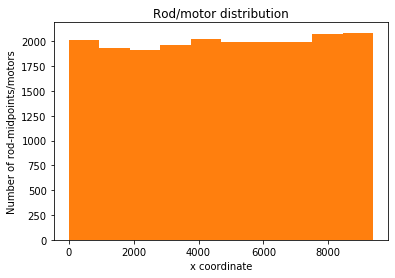

In [17]:
bothPositions(rods, motors, numberOfRods)

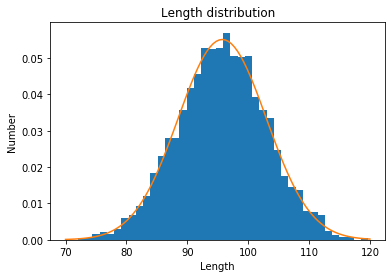

In [9]:
lengthDistribution(length)


0.68692286171357 2.4312416748136294


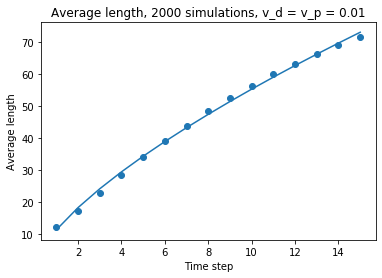

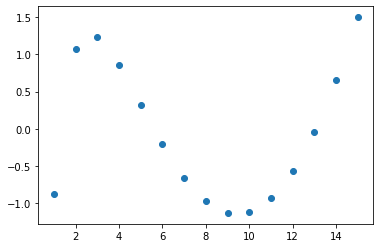

In [68]:
means = np.zeros(allLengths[0, :].size)
for tstep in range(0, allLengths[0, :].size):
    mean = np.mean(allLengths[:, tstep])
    means[tstep] = mean

print(a,b)
def power_t(x, a, b):
    return np.exp(b)*np.power(x, a)
x = np.linspace(1, means.size-185, means.size-185)
#plt.plot(np.linspace(0, means.size, means.size), (means))
plt.xlabel('Time step')
plt.ylabel('Average length')
plt.title('Average length, 2000 simulations, v_d = v_p = 0.01')
plt.scatter(x, means[:15])
plt.plot(x, power_t(x, a, b))

plt.show()
plt.scatter(x, np.subtract(power_t(x, a,b), means[:15]))

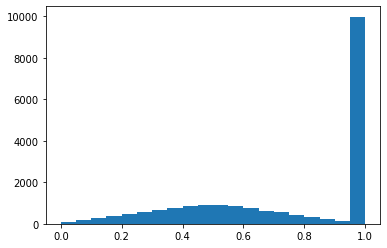

In [18]:
motorRelativePositions(motors)